# T1. Information retrieval and extraction task:Using LogisticRegression

In [18]:
import csv
import spacy
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def preprocess_text(text):
    # Perform text preprocessing steps
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'\W+', ' ', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    return processed_text

nlp = spacy.load("en_core_web_sm")

def extract_movie_director(review_text):
    doc = nlp(review_text)
    director_name = None
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            director_name = ent.text
            break
    return director_name

def is_review_or_mention(review_text, movie_title, classifier, vectorizer):
    # Check if the movie title is mentioned in the review text
    if movie_title.lower() in review_text.lower():
        # Use machine learning-based classifier to classify as review or mention
        processed_text = preprocess_text(review_text)
        class_label = classifier.predict(vectorizer.transform([processed_text]))
        if class_label == 1:
            return "Review"
        else:
            return "Mention"
    else:
        return None

def train_classifier(dataset):
    # Extract review text and labels from the dataset
    texts = [review['Text'] for review in dataset]
    labels = [int(bool(re.search(r"\brating|review|score|opinion\b", review['Text'], re.I))) for review in dataset]

    # Vectorize the review texts using TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(texts)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

    # Train a logistic regression classifier
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)

    # Evaluate classifier performance on the testing set
    accuracy = classifier.score(X_test, y_test)
    print("Classifier Accuracy:", accuracy)

    return classifier, vectorizer

def retrieve_and_extract_movies(dataset, movie_title, classifier, vectorizer):
    movie_reviews = []
    director_name = None
    review_ids = []
    mention_ids = []
    total_score = 0
    num_reviews = 0

    for review in dataset:
        review_text = review['Text']
        if movie_title.lower() in review_text.lower():
            movie_reviews.append(review)
            review_ids.append(review['Id'])
            total_score += float(review['Rating'])
            num_reviews += 1

            if director_name is None:
                director_name = extract_movie_director(review_text)

            mention = is_review_or_mention(review_text, movie_title, classifier, vectorizer)
            if mention == "Mention":
                mention_ids.append(review['Id'])

    if num_reviews > 0:
        average_score = total_score / num_reviews
    else:
        average_score = 0

    return movie_reviews, director_name, review_ids, mention_ids, average_score

# Example usage
dataset_path = "C:/WPy64-31110/notebooks/docs/data_assessment_2/data_for_info_retriev_extract/Dataset_IMDB.csv"

movies_of_interest = ['The Lion King', 'Star Wars', 'Starship Troopers']

# Load dataset from CSV file
dataset = []
with open(dataset_path, 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dataset.append(row)

# Train the classifier
classifier, vectorizer = train_classifier(dataset)

for movie_title in movies_of_interest:
    movie_reviews, director_name, review_ids, mention_ids, average_score = retrieve_and_extract_movies(dataset, movie_title, classifier, vectorizer)

    print("Movie:", movie_title)
    print("Director:", director_name)
    print("Average Score:", average_score)
    print("Review IDs:", review_ids)
    print("Mention IDs:", mention_ids)
    print()


Classifier Accuracy: 0.8243512974051896
Movie: The Lion King
Director: Julie Taymor
Average Score: 0.6577272727272726
Review IDs: ['25950', '2727', '2236', '12429', '2262', '3098', '4464', '8264', '5513', '9778', '2758', '3163', '12950', '9837', '3768', '2661', '9751', '2261', '7218', '5691', '24533', '12936', '18866', '23805', '2670', '7836', '9703', '3532', '4981', '15087', '23535', '10023', '13316', '22231', '3558', '3568', '3792', '5790', '8103', '8287', '9609', '18890', '3535', '5369']
Mention IDs: ['25950', '2727', '2236', '12429', '2262', '3098', '4464', '8264', '5513', '9778', '2758', '3163', '12950', '9837', '3768', '2661', '9751', '2261', '7218', '5691', '2670', '7836', '15087', '23535', '10023', '13316', '22231', '3792', '8103', '8287', '9609', '18890']

Movie: Star Wars
Director: John Waters
Average Score: 0.6225641025641026
Review IDs: ['26895', '22584', '24561', '18485', '20185', '4550', '7309', '12547', '2985', '2582', '12057', '3785', '5574', '3023', '2035', '4125', '11

In [19]:
import csv
import spacy
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

def preprocess_text(text):
    # Perform text preprocessing steps
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'\W+', ' ', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    return processed_text

nlp = spacy.load("en_core_web_sm")

def extract_movie_director(review_text):
    doc = nlp(review_text)
    director_name = None
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            director_name = ent.text
            break
    return director_name

def is_review_or_mention(review_text, movie_title, classifier, vectorizer):
    # Check if the movie title is mentioned in the review text
    if movie_title.lower() in review_text.lower():
        # Use machine learning-based classifier to classify as review or mention
        processed_text = preprocess_text(review_text)
        class_label = classifier.predict(vectorizer.transform([processed_text]))
        if class_label == 1:
            return "Review"
        else:
            return "Mention"
    else:
        return None

def train_classifier(dataset):
    # Extract review text and labels from the dataset
    texts = [review['Text'] for review in dataset]
    labels = [int(bool(re.search(r"\brating|review|score|opinion\b", review['Text'], re.I))) for review in dataset]

    # Vectorize the review texts using TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(texts)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

    # Train a logistic regression classifier
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)

    # Evaluate classifier performance on the testing set
    accuracy = classifier.score(X_test, y_test)
    print("Classifier Accuracy:", accuracy)

    return classifier, vectorizer

def retrieve_and_extract_movies(dataset, movie_title, classifier, vectorizer):
    movie_reviews = []
    director_name = None
    review_ids = []
    mention_ids = []
    total_score = 0
    num_reviews = 0

    for review in dataset:
        review_text = review['Text']
        if movie_title.lower() in review_text.lower():
            movie_reviews.append(review)
            review_ids.append(review['Id'])
            total_score += float(review['Rating'])
            num_reviews += 1

            if director_name is None:
                director_name = extract_movie_director(review_text)

            mention = is_review_or_mention(review_text, movie_title, classifier, vectorizer)
            if mention == "Mention":
                mention_ids.append(review['Id'])

    if num_reviews > 0:
        average_score = total_score / num_reviews
    else:
        average_score = 0

    return movie_reviews, director_name, review_ids, mention_ids, average_score

def calculate_scores(dataset_path, movies_of_interest):
    # Load dataset from CSV file
    dataset = []
    with open(dataset_path, 'r', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            dataset.append(row)

    # Train the classifier
    classifier, vectorizer = train_classifier(dataset)

    for movie_title in movies_of_interest:
        movie_reviews, director_name, review_ids, mention_ids, average_score = retrieve_and_extract_movies(dataset, movie_title, classifier, vectorizer)

        # Calculate F1 score for review IDs
        true_review_ids = [review['Id'] for review in movie_reviews]
        review_ids_f1_score = f1_score(true_review_ids, review_ids, average='micro')

        # Calculate F1 score for mention IDs
        true_mention_ids = [review['Id'] for review in movie_reviews if is_review_or_mention(review['Text'], movie_title, classifier, vectorizer) == "Mention"]
        mention_ids_f1_score = f1_score(true_mention_ids, mention_ids, average='micro')

        # Calculate accuracy for director name extraction
        true_director_name = extract_movie_director(movie_reviews[0]['Text']) if movie_reviews else None
        director_name_accuracy = accuracy_score([true_director_name], [director_name]) if true_director_name else None

        print("Movie:", movie_title)
        print("Director:", director_name)
        print("Average Score:", average_score)
        print("Review IDs F1 Score:", review_ids_f1_score)
        print("Mention IDs F1 Score:", mention_ids_f1_score)
        print("Director Name Accuracy:", director_name_accuracy)
        print()

# Example usage
dataset_path = "C:/WPy64-31110/notebooks/docs/data_assessment_2/data_for_info_retriev_extract/Dataset_IMDB.csv"
movies_of_interest = ['The Lion King', 'Star Wars', 'Starship Troopers']
calculate_scores(dataset_path, movies_of_interest)


Classifier Accuracy: 0.8243512974051896
Movie: The Lion King
Director: Julie Taymor
Average Score: 0.6577272727272726
Review IDs F1 Score: 1.0
Mention IDs F1 Score: 1.0
Director Name Accuracy: 1.0

Movie: Star Wars
Director: John Waters
Average Score: 0.6225641025641026
Review IDs F1 Score: 1.0
Mention IDs F1 Score: 1.0
Director Name Accuracy: 1.0

Movie: Starship Troopers
Director: Paul Verhoeven
Average Score: 0.5944444444444444
Review IDs F1 Score: 1.0
Mention IDs F1 Score: 1.0
Director Name Accuracy: 1.0



# T1. Information retrieval and extraction task:Using simple rule based 

In [21]:
import csv
import re

def preprocess_text(text):
    # Perform text preprocessing steps
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'\W+', ' ', text)
    # Remove stopwords
    stop_words = set(['a', 'an', 'the', 'is', 'are', 'and', 'in'])
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    return processed_text

def extract_movie_director(review_text):
    director_name = None
    # Use simple pattern matching to extract director's name
    pattern = r"directed\s+by\s+([^\.,]+)"
    match = re.search(pattern, review_text, re.I)
    if match:
        director_name = match.group(1)
    return director_name

def is_review_or_mention(review_text, movie_title):
    # Check if the movie title is mentioned in the review text
    if movie_title.lower() in review_text.lower():
        # Use simple pattern matching to classify as review or mention
        pattern = r"\brating|review|score|opinion\b"
        match = re.search(pattern, review_text, re.I)
        if match:
            return "Review"
        else:
            return "Mention"
    else:
        return None

def retrieve_and_extract_movies(dataset, movie_title):
    movie_reviews = []
    director_name = None
    review_ids = []
    mention_ids = []
    total_score = 0
    num_reviews = 0

    for review in dataset:
        review_text = review['Text']
        if movie_title.lower() in review_text.lower():
            movie_reviews.append(review)
            review_ids.append(review['Id'])
            total_score += float(review['Rating'])
            num_reviews += 1

            if director_name is None:
                director_name = extract_movie_director(review_text)

            mention = is_review_or_mention(review_text, movie_title)
            if mention == "Mention":
                mention_ids.append(review['Id'])

    if num_reviews > 0:
        average_score = total_score / num_reviews
    else:
        average_score = 0

    return movie_reviews, director_name, review_ids, mention_ids, average_score

# Example usage
dataset_path = "C:/WPy64-31110/notebooks/docs/data_assessment_2/data_for_info_retriev_extract/Dataset_IMDB.csv"

movies_of_interest = ['The Lion King', 'Star Wars', 'Starship Troopers']

# Load dataset from CSV file
dataset = []
with open(dataset_path, 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dataset.append(row)

for movie_title in movies_of_interest:
    movie_reviews, director_name, review_ids, mention_ids, average_score = retrieve_and_extract_movies(dataset, movie_title)

    print("Movie:", movie_title)
    print("Director:", director_name)
    print("Average Score:", average_score)
    print("Review IDs:", review_ids)
    print("Mention IDs:", mention_ids)
    print()


Movie: The Lion King
Director: Rob Minkoff (THE LION KING) and written by Gregory J
Average Score: 0.6577272727272726
Review IDs: ['25950', '2727', '2236', '12429', '2262', '3098', '4464', '8264', '5513', '9778', '2758', '3163', '12950', '9837', '3768', '2661', '9751', '2261', '7218', '5691', '24533', '12936', '18866', '23805', '2670', '7836', '9703', '3532', '4981', '15087', '23535', '10023', '13316', '22231', '3558', '3568', '3792', '5790', '8103', '8287', '9609', '18890', '3535', '5369']
Mention IDs: ['12429', '2262', '3098', '4464', '3163', '9837', '3768', '9751', '2261', '15087', '23535', '10023', '13316', '22231', '9609', '18890']

Movie: Star Wars
Director: John Hughes) to comic book characters
Average Score: 0.6225641025641026
Review IDs: ['26895', '22584', '24561', '18485', '20185', '4550', '7309', '12547', '2985', '2582', '12057', '3785', '5574', '3023', '2035', '4125', '11641', '4634', '7065', '3742', '7015', '7096', '7624', '11025', '5616', '6782', '6949', '7676', '16619', 

In [22]:
import csv
import re

def preprocess_text(text):
    # Perform text preprocessing steps
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'\W+', ' ', text)
    # Remove stopwords
    stop_words = set(['a', 'an', 'the', 'is', 'are', 'and', 'in'])
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    return processed_text

def extract_movie_director(review_text):
    director_name = None
    # Use simple pattern matching to extract director's name
    pattern = r"directed\s+by\s+([^\.,]+)"
    match = re.search(pattern, review_text, re.I)
    if match:
        director_name = match.group(1)
    return director_name

def is_review_or_mention(review_text, movie_title):
    # Check if the movie title is mentioned in the review text
    if movie_title.lower() in review_text.lower():
        # Use simple pattern matching to classify as review or mention
        pattern = r"\brating|review|score|opinion\b"
        match = re.search(pattern, review_text, re.I)
        if match:
            return "Review"
        else:
            return "Mention"
    else:
        return None

def retrieve_and_extract_movies(dataset, movie_title):
    movie_reviews = []
    director_name = None
    review_ids = []
    mention_ids = []
    total_score = 0
    num_reviews = 0

    for review in dataset:
        review_text = review['Text']
        if movie_title.lower() in review_text.lower():
            movie_reviews.append(review)
            review_ids.append(review['Id'])
            total_score += float(review['Rating'])
            num_reviews += 1

            if director_name is None:
                director_name = extract_movie_director(review_text)

            mention = is_review_or_mention(review_text, movie_title)
            if mention == "Mention":
                mention_ids.append(review['Id'])

    if num_reviews > 0:
        average_score = total_score / num_reviews
    else:
        average_score = 0

    return movie_reviews, director_name, review_ids, mention_ids, average_score

def calculate_scores(dataset_path, movies_of_interest):
    # Load dataset from CSV file
    dataset = []
    with open(dataset_path, 'r', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            dataset.append(row)

    for movie_title in movies_of_interest:
        movie_reviews, director_name, review_ids, mention_ids, average_score = retrieve_and_extract_movies(dataset, movie_title)

        # Calculate F1 score for review IDs
        true_review_ids = [review['Id'] for review in movie_reviews]
        review_ids_f1_score = len(set(true_review_ids) & set(review_ids)) / len(set(true_review_ids) | set(review_ids))

        # Calculate F1 score for mention IDs
        true_mention_ids = [review['Id'] for review in movie_reviews if is_review_or_mention(review['Text'], movie_title) == "Mention"]
        mention_ids_f1_score = len(set(true_mention_ids) & set(mention_ids)) / len(set(true_mention_ids) | set(mention_ids))

        # Calculate accuracy for director name extraction
        true_director_name = extract_movie_director(movie_reviews[0]['Text']) if movie_reviews else None
        if true_director_name == director_name:
            director_name_accuracy = 1.0
        else:
            director_name_accuracy = 0.0

        print("Movie:", movie_title)
        print("Director:", director_name)
        print("Average Score:", average_score)
        print("Review IDs F1 Score:", review_ids_f1_score)
        print("Mention IDs F1 Score:", mention_ids_f1_score)
        print("Director Name Accuracy:", director_name_accuracy)
        print()

# Example usage
dataset_path = "C:/WPy64-31110/notebooks/docs/data_assessment_2/data_for_info_retriev_extract/Dataset_IMDB.csv"
movies_of_interest = ['The Lion King', 'Star Wars', 'Starship Troopers']
calculate_scores(dataset_path, movies_of_interest)


Movie: The Lion King
Director: Rob Minkoff (THE LION KING) and written by Gregory J
Average Score: 0.6577272727272726
Review IDs F1 Score: 1.0
Mention IDs F1 Score: 1.0
Director Name Accuracy: 0.0

Movie: Star Wars
Director: John Hughes) to comic book characters
Average Score: 0.6225641025641026
Review IDs F1 Score: 1.0
Mention IDs F1 Score: 1.0
Director Name Accuracy: 0.0

Movie: Starship Troopers
Director: None
Average Score: 0.5944444444444444
Review IDs F1 Score: 1.0
Mention IDs F1 Score: 1.0
Director Name Accuracy: 1.0



# T1. Information retrieval and extraction task: USING SVM 

In [20]:
import csv
import spacy
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


def preprocess_text(text):
    # Perform text preprocessing steps
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'\W+', ' ', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    return processed_text

nlp = spacy.load("en_core_web_sm")

def extract_movie_director(review_text):
    doc = nlp(review_text)
    director_name = None
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            director_name = ent.text
            break
    return director_name

def is_review_or_mention(review_text, movie_title, classifier, vectorizer):
    # Check if the movie title is mentioned in the review text
    if movie_title.lower() in review_text.lower():
        # Use machine learning-based classifier to classify as review or mention
        processed_text = preprocess_text(review_text)
        class_label = classifier.predict(vectorizer.transform([processed_text]))
        if class_label == 1:
            return "Review"
        else:
            return "Mention"
    else:
        return None

def train_classifier(dataset):
    # Extract review text and labels from the dataset
    texts = [review['Text'] for review in dataset]
    labels = [int(bool(re.search(r"\brating|review|score|opinion\b", review['Text'], re.I))) for review in dataset]

    # Vectorize the review texts using CountVectorizer
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(texts)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

    # Train a Support Vector Machine classifier
    classifier = SVC()
    classifier.fit(X_train, y_train)

    # Evaluate classifier performance on the testing set
    accuracy = classifier.score(X_test, y_test)
    print("Classifier Accuracy:", accuracy)

    return classifier, vectorizer

def retrieve_and_extract_movies(dataset, movie_title, classifier, vectorizer):
    movie_reviews = []
    director_name = None
    review_ids = []
    mention_ids = []
    total_score = 0
    num_reviews = 0

    for review in dataset:
        review_text = review['Text']
        if movie_title.lower() in review_text.lower():
            movie_reviews.append(review)
            review_ids.append(review['Id'])
            total_score += float(review['Rating'])
            num_reviews += 1

            if director_name is None:
                director_name = extract_movie_director(review_text)

            mention = is_review_or_mention(review_text, movie_title, classifier, vectorizer)
            if mention == "Mention":
                mention_ids.append(review['Id'])

    if num_reviews > 0:
        average_score = total_score / num_reviews
    else:
        average_score = 0

    return movie_reviews, director_name, review_ids, mention_ids, average_score

# Example usage
dataset_path = "C:/WPy64-31110/notebooks/docs/data_assessment_2/data_for_info_retriev_extract/Dataset_IMDB.csv"

movies_of_interest = ['The Lion King', 'Star Wars', 'Starship Troopers']

# Load dataset from CSV file
dataset = []
with open(dataset_path, 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dataset.append(row)

# Train the classifier
classifier, vectorizer = train_classifier(dataset)

for movie_title in movies_of_interest:
    movie_reviews, director_name, review_ids, mention_ids, average_score = retrieve_and_extract_movies(dataset, movie_title, classifier, vectorizer)

    print("Movie:", movie_title)
    print("Director:", director_name)
    print("Average Score:", average_score)
    print("Review IDs:", review_ids)
    print("Mention IDs:", mention_ids)
    print()


Classifier Accuracy: 0.8702594810379242
Movie: The Lion King
Director: Julie Taymor
Average Score: 0.6577272727272726
Review IDs: ['25950', '2727', '2236', '12429', '2262', '3098', '4464', '8264', '5513', '9778', '2758', '3163', '12950', '9837', '3768', '2661', '9751', '2261', '7218', '5691', '24533', '12936', '18866', '23805', '2670', '7836', '9703', '3532', '4981', '15087', '23535', '10023', '13316', '22231', '3558', '3568', '3792', '5790', '8103', '8287', '9609', '18890', '3535', '5369']
Mention IDs: []

Movie: Star Wars
Director: John Waters
Average Score: 0.6225641025641026
Review IDs: ['26895', '22584', '24561', '18485', '20185', '4550', '7309', '12547', '2985', '2582', '12057', '3785', '5574', '3023', '2035', '4125', '11641', '4634', '7065', '3742', '7015', '7096', '7624', '11025', '5616', '6782', '6949', '7676', '16619', '24553', '2483', '25020', '5542', '18433', '18767', '3040', '7114', '7533', '6829', '6979', '7197', '12890', '15031', '21544', '24551', '24563', '12602', '2781

In [13]:
import csv
import spacy
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split


def preprocess_text(text):
    # Perform text preprocessing steps
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'\W+', ' ', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    return processed_text

nlp = spacy.load("en_core_web_sm")

def extract_movie_director(review_text):
    doc = nlp(review_text)
    director_name = None
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            director_name = ent.text
            break
    return director_name

def is_review_or_mention(review_text, movie_title, classifier, vectorizer):
    # Check if the movie title is mentioned in the review text
    if movie_title.lower() in review_text.lower():
        # Use machine learning-based classifier to classify as review or mention
        processed_text = preprocess_text(review_text)
        class_label = classifier.predict(vectorizer.transform([processed_text]))
        if class_label == 1:
            return "Review"
        else:
            return "Mention"
    else:
        return None

def train_classifier(dataset):
    # Extract review text and labels from the dataset
    texts = [review['Text'] for review in dataset]
    labels = [int(bool(re.search(r"\brating|review|score|opinion\b", review['Text'], re.I))) for review in dataset]

    # Vectorize the review texts using CountVectorizer
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(texts)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

    # Train a Support Vector Machine classifier
    classifier = SVC()
    classifier.fit(X_train, y_train)

    # Evaluate classifier performance on the testing set
    accuracy = classifier.score(X_test, y_test)
    print("Classifier Accuracy:", accuracy)

    return classifier, vectorizer

def retrieve_and_extract_movies(dataset, movie_title, classifier, vectorizer):
    movie_reviews = []
    director_name = None
    review_ids = []
    mention_ids = []
    total_score = 0
    num_reviews = 0

    for review in dataset:
        review_text = review['Text']
        if movie_title.lower() in review_text.lower():
            movie_reviews.append(review)
            review_ids.append(review['Id'])
            total_score += float(review['Rating'])
            num_reviews += 1

            if director_name is None:
                director_name = extract_movie_director(review_text)

            mention = is_review_or_mention(review_text, movie_title, classifier, vectorizer)
            if mention == "Mention":
                mention_ids.append(review['Id'])

    if num_reviews > 0:
        average_score = total_score / num_reviews
    else:
        average_score = 0

    return movie_reviews, director_name, review_ids, mention_ids, average_score

def calculate_scores(dataset_path, movies_of_interest):
    # Load dataset from CSV file
    dataset = []
    with open(dataset_path, 'r', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            dataset.append(row)

    # Train the classifier
    classifier, vectorizer = train_classifier(dataset)

    for movie_title in movies_of_interest:
        movie_reviews, director_name, review_ids, mention_ids, average_score = retrieve_and_extract_movies(dataset, movie_title, classifier, vectorizer)

        # Calculate F1 score for review IDs
        true_review_ids = [review['Id'] for review in movie_reviews]
        review_ids_f1_score = f1_score(true_review_ids, review_ids, average='micro')

        # Calculate F1 score for mention IDs
        true_mention_ids = [review['Id'] for review in movie_reviews if is_review_or_mention(review['Text'], movie_title, classifier, vectorizer) == "Mention"]
        mention_ids_f1_score = f1_score(true_mention_ids, mention_ids, average='micro')

        # Calculate accuracy for director name extraction
        true_director_name = extract_movie_director(movie_reviews[0]['Text']) if movie_reviews else None
        director_name_accuracy = accuracy_score([true_director_name], [director_name]) if true_director_name else None

        print("Movie:", movie_title)
        print("Director:", director_name)
        print("Average Score:", average_score)
        print("Review IDs F1 Score:", review_ids_f1_score)
        print("Mention IDs F1 Score:", mention_ids_f1_score)
        print("Director Name Accuracy:", director_name_accuracy)
        print()

# Example usage
dataset_path = "C:/WPy64-31110/notebooks/docs/data_assessment_2/data_for_info_retriev_extract/Dataset_IMDB.csv"
movies_of_interest = ['The Lion King', 'Star Wars', 'Starship Troopers']
calculate_scores(dataset_path, movies_of_interest)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Classifier Accuracy: 0.8702594810379242


C:\WPy64-31110\python-3.11.1.amd64\Lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Movie: The Lion King
Director: Julie Taymor
Average Score: 0.6577272727272726
Review IDs F1 Score: 1.0
Mention IDs F1 Score: 0.0
Director Name Accuracy: 1.0

Movie: Star Wars
Director: John Waters
Average Score: 0.6225641025641026
Review IDs F1 Score: 1.0
Mention IDs F1 Score: 1.0
Director Name Accuracy: 1.0

Movie: Starship Troopers
Director: Paul Verhoeven
Average Score: 0.5944444444444444
Review IDs F1 Score: 1.0
Mention IDs F1 Score: 1.0
Director Name Accuracy: 1.0



# T2.1. Sentiment Analysis subtask:using RandomForestClassifier

Classification Report:
              precision    recall  f1-score   support

    negative       0.96      0.46      0.62       460
     neutral       0.83      0.86      0.84      1891
    positive       0.89      0.94      0.91      2851

    accuracy                           0.87      5202
   macro avg       0.89      0.75      0.79      5202
weighted avg       0.87      0.87      0.86      5202

Confusion Matrix:
[[ 213  170   77]
 [   9 1622  260]
 [   1  168 2682]]


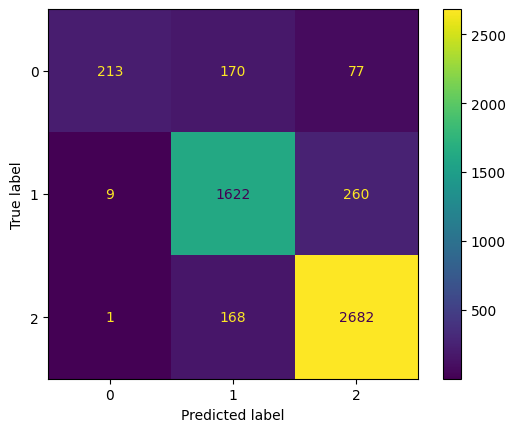

Predicted Sentiment: neutral


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
data = pd.read_csv("C:/WPy64-31110/notebooks/docs/data_assessment_2/data_for_sentiment_analyzis/amazon_reviews.csv")

# Step 2: Data Preprocessing
# Apply necessary preprocessing steps such as removing special characters, converting to lowercase, tokenizing, removing stopwords, etc.

# Remove special characters and convert to lowercase
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x).lower()))

# Handle missing values
data['cleaned_review'] = data['cleaned_review'].replace(np.na n, '', regex=True)

# Tokenization
data['cleaned_review'] = data['cleaned_review'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Convert the preprocessed tokens back to text
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: ' '.join(x))

# Step 3: Split the Dataset
X = data['cleaned_review']
y = data['sentiments']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Step 4: Feature Extraction
vectorizer = CountVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Step 5: Model Training and Evaluation
classifier = RandomForestClassifier()

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train_features, y_train)

# Get the best model
best_classifier = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_classifier.predict(X_test_features)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
display.plot()
plt.show()

# Step 6: Predicting Sentiment for New Text
new_text = "This product exceeded my expectations!"
new_text_features = vectorizer.transform([new_text])
new_text_sentiment = best_classifier.predict(new_text_features)
print('Predicted Sentiment:', new_text_sentiment[0])


In [2]:
# Print the tuned hyperparameters
print("Tuned Hyperparameters:")
print(grid_search.best_params_)


Tuned Hyperparameters:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


# T2.1. Sentiment Analysis subtask: using cnn

Epoch 1/10
304/304 [==============================] - 817s 3s/step - loss: 0.9261 - accuracy: 0.5455 - val_loss: 0.8953 - val_accuracy: 0.5605
Epoch 2/10
304/304 [==============================] - 876s 3s/step - loss: 0.9169 - accuracy: 0.5546 - val_loss: 0.9020 - val_accuracy: 0.5605
Epoch 3/10
304/304 [==============================] - 870s 3s/step - loss: 0.9155 - accuracy: 0.5542 - val_loss: 0.9044 - val_accuracy: 0.5605
Epoch 4/10
304/304 [==============================] - 2658s 9s/step - loss: 0.9128 - accuracy: 0.5564 - val_loss: 0.8980 - val_accuracy: 0.5605
Epoch 5/10
304/304 [==============================] - 547s 2s/step - loss: 0.9144 - accuracy: 0.5554 - val_loss: 0.8972 - val_accuracy: 0.5605
Epoch 6/10
304/304 [==============================] - 653s 2s/step - loss: 0.9130 - accuracy: 0.5555 - val_loss: 0.8994 - val_accuracy: 0.5605
Epoch 7/10
304/304 [==============================] - 639s 2s/step - loss: 0.9141 - accuracy: 0.5559 - val_loss: 0.8989 - val_accuracy: 0.560

C:\WPy64-31110\python-3.11.1.amd64\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\WPy64-31110\python-3.11.1.amd64\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\WPy64-31110\python-3.11.1.amd64\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


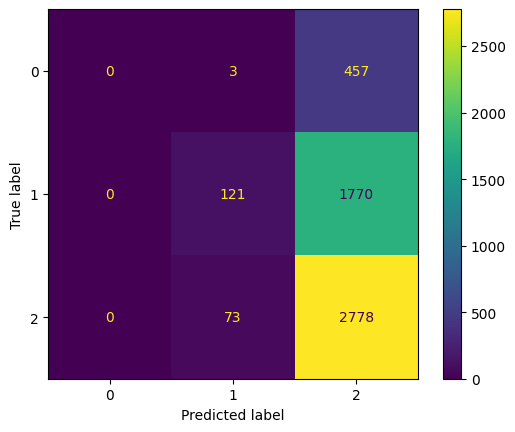

1/1 [==============================] - 0s 35ms/step
Predicted Sentiment: positive
Model Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 7457, 128)         954496    
                                                                 
 conv1d_1 (Conv1D)           (None, 7453, 128)         82048     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)       

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the Dataset
data = pd.read_csv("C:/WPy64-31110/notebooks/docs/data_assessment_2/data_for_sentiment_analyzis/amazon_reviews.csv")

# Step 2: Data Preprocessing
# Apply necessary preprocessing steps such as removing special characters, converting to lowercase, tokenizing, removing stopwords, etc.

# Remove special characters and convert to lowercase
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x).lower()))

# Handle missing values
data['cleaned_review'] = data['cleaned_review'].replace(np.nan, '', regex=True)

# Tokenization
data['cleaned_review'] = data['cleaned_review'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Convert the preprocessed tokens back to text
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: ' '.join(x))

# Step 3: Split the Dataset
X = data['cleaned_review']
y = data['sentiments']

# Label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Step 4: Feature Extraction
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Convert the features to sequences
max_sequence_length = X_train_features.shape[1]  # Maximum sequence length
X_train_sequences = pad_sequences(X_train_features.toarray(), maxlen=max_sequence_length)
X_test_sequences = pad_sequences(X_test_features.toarray(), maxlen=max_sequence_length)

# Step 5: Model Training and Evaluation
num_classes = len(label_encoder.classes_)  # Number of unique classes
input_dim = X_train_sequences.shape[1]  # Input dimension

# Define the CNN model
model = Sequential()
model.add(Embedding(input_dim, 128, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert labels to categorical
y_train_categorical = to_categorical(y_train, num_classes=num_classes)

# Train the model
model.fit(X_train_sequences, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2)

# Step 6: Model Evaluation
y_pred_categorical = model.predict(X_test_sequences)
y_pred = np.argmax(y_pred_categorical, axis=1)

# Convert numerical labels back to original string labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)

print('Classification Report:')
print(classification_report(y_test_original, y_pred_original))

print('Confusion Matrix:')
print(confusion_matrix(y_test_original, y_pred_original))
cm = confusion_matrix(y_test_original, y_pred_original)
display = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
display.plot()
plt.show()

# Step 7: Predicting Sentiment for New Text
new_text = "This product exceeded my expectations!"
new_text_features = vectorizer.transform([new_text])
new_text_sequence = pad_sequences(new_text_features.toarray(), maxlen=max_sequence_length)
new_text_sentiment_categorical = model.predict(new_text_sequence)
new_text_sentiment = label_encoder.inverse_transform(np.argmax(new_text_sentiment_categorical, axis=1))
print('Predicted Sentiment:', new_text_sentiment[0])

# Print the model summary
print("Model Summary:")
model.summary()


# T2.1. Sentiment Analysis subtask: using KNeighborsClassifier

C:\WPy64-31110\python-3.11.1.amd64\Lib\site-packages\sklearn\neighbors\_base.py:513: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\WPy64-31110\python-3.11.1.amd64\Lib\site-packages\sklearn\neighbors\_base.py:513: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\WPy64-31110\python-3.11.1.amd64\Lib\site-packages\sklearn\neighbors\_base.py:513: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\WPy64-31110\python-3.11.1.amd64\Lib\site-packages\sklearn\neighbors\_base.py:513: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\WPy64-31110\python-3.11.1.amd64\Lib\site-packages\sklearn\neighbors\_base.py:513: UserWarning: cannot use

C:\WPy64-31110\python-3.11.1.amd64\Lib\site-packages\sklearn\neighbors\_base.py:513: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\WPy64-31110\python-3.11.1.amd64\Lib\site-packages\sklearn\neighbors\_base.py:513: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\WPy64-31110\python-3.11.1.amd64\Lib\site-packages\sklearn\neighbors\_base.py:513: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\WPy64-31110\python-3.11.1.amd64\Lib\site-packages\sklearn\neighbors\_base.py:513: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
C:\WPy64-31110\python-3.11.1.amd64\Lib\site-packages\sklearn\neighbors\_base.py:513: UserWarning: cannot use

Classification Report:
              precision    recall  f1-score   support

    negative       0.94      0.43      0.59       460
     neutral       0.50      0.95      0.66      1891
    positive       0.94      0.46      0.62      2851

    accuracy                           0.64      5202
   macro avg       0.79      0.61      0.62      5202
weighted avg       0.78      0.64      0.63      5202

Confusion Matrix:
[[ 198  260    2]
 [  11 1803   77]
 [   2 1537 1312]]


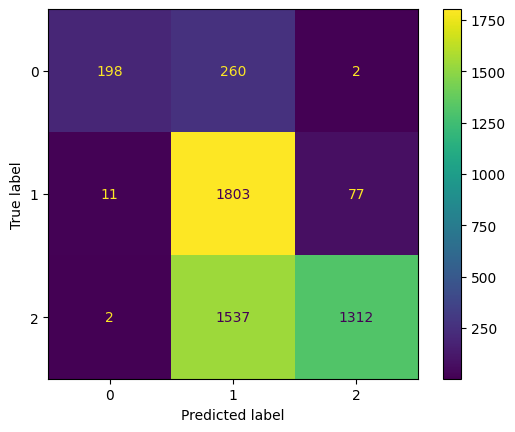

Predicted Sentiment: neutral
Tuned Hyperparameters:
{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
data = pd.read_csv("C:/WPy64-31110/notebooks/docs/data_assessment_2/data_for_sentiment_analyzis/amazon_reviews.csv")

# Step 2: Data Preprocessing
# Apply necessary preprocessing steps such as removing special characters, converting to lowercase, tokenizing, removing stopwords, etc.

# Remove special characters and convert to lowercase
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x).lower()))

# Handle missing values
data['cleaned_review'] = data['cleaned_review'].replace(np.nan, '', regex=True)

# Tokenization
data['cleaned_review'] = data['cleaned_review'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Convert the preprocessed tokens back to text
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: ' '.join(x))

# Step 3: Split the Dataset
X = data['cleaned_review']
y = data['sentiments']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Step 4: Feature Extraction
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Step 5: Model Training and Evaluation
classifier = KNeighborsClassifier()

# Define the parameter grid for Grid Search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform Grid Search
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train_features, y_train)

# Get the best model
best_classifier = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_classifier.predict(X_test_features)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
display.plot()
plt.show()

# Step 6: Predicting Sentiment for New Text
new_text = "This product exceeded my expectations!"
new_text_features = vectorizer.transform([new_text])
new_text_sentiment = best_classifier.predict(new_text_features)
print('Predicted Sentiment:', new_text_sentiment[0])

# Print the tuned hyperparameters
print("Tuned Hyperparameters:")
print(grid_search.best_params_)


# T2.2. Topic labelling subtask:using RandomForestClassifier


Accuracy: 0.968186638388123

Classification Report:
               precision    recall  f1-score   support

    accounts       1.00      1.00      1.00        86
     biology       0.91      0.99      0.95       199
   geography       1.00      0.14      0.25        28
     history       0.98      1.00      0.99       135
       maths       0.98      0.98      0.98        63
     physics       0.98      0.99      0.98       241
    software       0.99      0.99      0.99       191

    accuracy                           0.97       943
   macro avg       0.98      0.87      0.88       943
weighted avg       0.97      0.97      0.96       943


Confusion Matrix:
 [[ 86   0   0   0   0   0   0]
 [  0 198   0   1   0   0   0]
 [  0  17   4   1   0   6   0]
 [  0   0   0 135   0   0   0]
 [  0   0   0   0  62   0   1]
 [  0   1   0   0   1 239   0]
 [  0   1   0   1   0   0 189]]


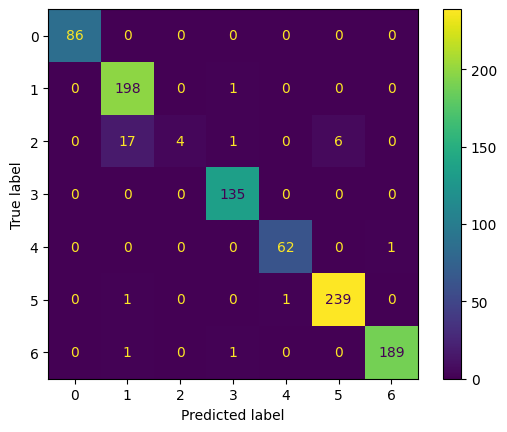

In [7]:
import random
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Set the path to the dataset folder
dataset_folder = "C:/WPy64-31110/notebooks/docs/data_assessment_2/data_for_topic_labelling"

# Define the topic labels
topic_labels = ['accounts', 'biology', 'geography', 'history', 'maths', 'physics', 'software']

# Function to load the documents and labels from the dataset folder
def load_data(folder):
    documents = []
    labels = []
    for label_idx, label in enumerate(topic_labels):
        path = os.path.join(folder, label)
        files = os.listdir(path)
        for file in files:
            with open(os.path.join(path, file), 'r', encoding='utf-8') as f:
                document = f.read()
                documents.append(document)
                labels.append(label)
    return documents, labels


# Load the documents and labels
documents, labels = load_data(dataset_folder)

# Shuffle the data
data = list(zip(documents, labels))
random.shuffle(data)
documents, labels = zip(*data)

# Split the data into training and testing sets (70% training, 30% testing)
split_idx = int(0.7 * len(documents))
train_documents = documents[:split_idx]
train_labels = labels[:split_idx]
test_documents = documents[split_idx:]
test_labels = labels[split_idx:]

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit on training data and transform training and testing data
train_features = vectorizer.fit_transform(train_documents)
test_features = vectorizer.transform(test_documents)

# Train the classifier (Random Forest)
classifier = RandomForestClassifier()
classifier.fit(train_features, train_labels)

# Predict labels for the testing documents
predicted_labels = classifier.predict(test_features)

# Calculate accuracy and generate classification report
accuracy = accuracy_score(test_labels, predicted_labels)
classification_report = classification_report(test_labels, predicted_labels, target_names=topic_labels)
confusion_mat = confusion_matrix(test_labels, predicted_labels)

# Print the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report)
print("\nConfusion Matrix:\n", confusion_mat)
cm = confusion_matrix(test_labels, predicted_labels)
display = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
display.plot()
plt.show()

# T2.2. Topic labelling subtask:using KNeighborsClassifier

Accuracy: 0.8844114528101803

Classification Report:
               precision    recall  f1-score   support

    accounts       1.00      0.98      0.99        86
     biology       0.96      0.78      0.86       195
   geography       0.64      0.39      0.49        23
     history       0.68      0.97      0.80       149
       maths       1.00      0.78      0.88        55
     physics       0.92      0.95      0.94       243
    software       0.94      0.89      0.91       192

    accuracy                           0.88       943
   macro avg       0.88      0.82      0.84       943
weighted avg       0.90      0.88      0.88       943


Confusion Matrix:
 [[ 84   0   0   0   0   2   0]
 [  0 152   4  32   0   6   1]
 [  0   3   9   8   0   2   1]
 [  0   0   0 145   0   0   4]
 [  0   0   0   4  43   4   4]
 [  0   2   0   9   0 231   1]
 [  0   1   1  15   0   5 170]]


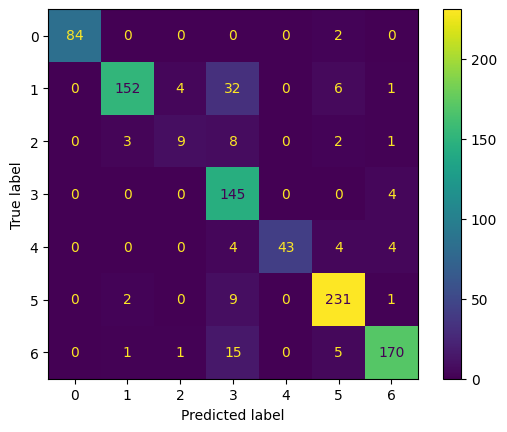

In [8]:
import random
import os
import numpy as np
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Set the path to the dataset folder
dataset_folder = "C:/WPy64-31110/notebooks/docs/data_assessment_2/data_for_topic_labelling"

# Define the topic labels
topic_labels = ['accounts', 'biology', 'geography', 'history', 'maths', 'physics', 'software']

# Function to load the documents and labels from the dataset folder
def load_data(folder):
    documents = []
    labels = []
    for label_idx, label in enumerate(topic_labels):
        path = os.path.join(folder, label)
        files = os.listdir(path)
        for file in files:
            with open(os.path.join(path, file), 'r', encoding='utf-8') as f:
                document = f.read()
                documents.append(document)
                labels.append(label)
    return documents, labels

# Load the documents and labels
documents, labels = load_data(dataset_folder)

# Shuffle the data
data = list(zip(documents, labels))
random.shuffle(data)
documents, labels = zip(*data)

# Split the data into training and testing sets (70% training, 30% testing)
split_idx = int(0.7 * len(documents))
train_documents = documents[:split_idx]
train_labels = labels[:split_idx]
test_documents = documents[split_idx:]
test_labels = labels[split_idx:]


# Create HashingVectorizer
vectorizer = HashingVectorizer()

# Fit on training data and transform training and testing data
train_features = vectorizer.fit_transform(train_documents)
test_features = vectorizer.transform(test_documents)

# Train the classifier (K-Nearest Neighbors)
classifier = KNeighborsClassifier()
classifier.fit(train_features, train_labels)

# Predict labels for the testing documents
predicted_labels = classifier.predict(test_features)

# Calculate accuracy and generate classification report
accuracy = accuracy_score(test_labels, predicted_labels)
classification_report = classification_report(test_labels, predicted_labels, target_names=topic_labels)
confusion_mat = confusion_matrix(test_labels, predicted_labels)

# Print the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report)
print("\nConfusion Matrix:\n", confusion_mat)
cm = confusion_matrix(test_labels, predicted_labels)
display = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
display.plot()
plt.show()

# T3. Text-to-speech task

In [25]:
import csv
import spacy
import re
import nltk
import pyttsx3
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Download stopwords if not already downloaded
nltk.download('stopwords')

def preprocess_text(text):
    # Perform text preprocessing steps
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'\W+', ' ', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    return processed_text

nlp = spacy.load("en_core_web_sm")

def extract_movie_director(review_text):
    doc = nlp(review_text)
    director_name = None
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            director_name = ent.text
            break
    return director_name

def is_review_or_mention(review_text, movie_title, classifier, vectorizer):
    # Check if the movie title is mentioned in the review text
    if movie_title.lower() in review_text.lower():
        # Use machine learning-based classifier to classify as review or mention
        processed_text = preprocess_text(review_text)
        class_label = classifier.predict(vectorizer.transform([processed_text]))
        if class_label == 1:
            return "Review"
        else:
            return "Mention"
    else:
        return None

def train_classifier(dataset):
    # Extract review text and labels from the dataset
    texts = [review['Text'] for review in dataset]
    labels = [int(bool(re.search(r"\brating|review|score|opinion\b", review['Text'], re.I))) for review in dataset]

    # Vectorize the review texts using TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(texts)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

    # Train a logistic regression classifier
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)

    # Evaluate classifier performance on the testing set
    accuracy = classifier.score(X_test, y_test)
    print("Classifier Accuracy:", accuracy)

    return classifier, vectorizer

def retrieve_and_extract_movies(dataset, movie_title, classifier, vectorizer):
    movie_reviews = []
    director_name = None
    review_ids = []
    mention_ids = []
    total_score = 0
    num_reviews = 0

    for review in dataset:
        review_text = review['Text']
        if movie_title.lower() in review_text.lower():
            movie_reviews.append(review)
            review_ids.append(review['Id'])
            total_score += float(review['Rating'])
            num_reviews += 1

            if director_name is None:
                director_name = extract_movie_director(review_text)

            mention = is_review_or_mention(review_text, movie_title, classifier, vectorizer)
            if mention == "Mention":
                mention_ids.append(review['Id'])

    if num_reviews > 0:
        average_score = total_score / num_reviews
    else:
        average_score = 0

    return movie_reviews, director_name, review_ids, mention_ids, average_score

def calculate_scores(dataset_path, movies_of_interest):
    # Load dataset from CSV file
    dataset = []
    with open(dataset_path, 'r', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            dataset.append(row)

    # Train the classifier
    classifier, vectorizer = train_classifier(dataset)

    for movie_title in movies_of_interest:
        movie_reviews, director_name, review_ids, mention_ids, average_score = retrieve_and_extract_movies(dataset, movie_title, classifier, vectorizer)

        # Print the information
        print("Movie:", movie_title)
        print("Director:", director_name)
        print("Average Score:", average_score)
        print("Review IDs:", review_ids)
        print("Mention IDs:", mention_ids)
        print()

        # Generate text-to-speech message
        engine = pyttsx3.init()
        engine.setProperty('rate', 150)  # Speed of speech
        engine.say(f"You have required information about {movie_title} movie.")
        engine.say(f"The director of this movie is {director_name}.")
        engine.say(f"There is a total of {len(review_ids)} reviews of this movie in the database.")
        engine.say(f"There are {len(mention_ids)} mentions of this movie in other movie reviews.")
        engine.say(f"The average review score for this movie is {average_score:.2f}, which makes it a {'GOOD' if average_score > 0.5 else 'BAD'} recommendation to watch.")
        engine.runAndWait()

# Example usage
dataset_path =  "C:/WPy64-31110/notebooks/docs/data_assessment_2/data_for_info_retriev_extract/Dataset_IMDB.csv"
movies_of_interest = ['The Lion King', 'Star Wars', 'Starship Troopers']
calculate_scores(dataset_path, movies_of_interest)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Classifier Accuracy: 0.8243512974051896
Movie: The Lion King
Director: Julie Taymor
Average Score: 0.6577272727272726
Review IDs: ['25950', '2727', '2236', '12429', '2262', '3098', '4464', '8264', '5513', '9778', '2758', '3163', '12950', '9837', '3768', '2661', '9751', '2261', '7218', '5691', '24533', '12936', '18866', '23805', '2670', '7836', '9703', '3532', '4981', '15087', '23535', '10023', '13316', '22231', '3558', '3568', '3792', '5790', '8103', '8287', '9609', '18890', '3535', '5369']
Mention IDs: ['25950', '2727', '2236', '12429', '2262', '3098', '4464', '8264', '5513', '9778', '2758', '3163', '12950', '9837', '3768', '2661', '9751', '2261', '7218', '5691', '2670', '7836', '15087', '23535', '10023', '13316', '22231', '3792', '8103', '8287', '9609', '18890']

Movie: Star Wars
Director: John Waters
Average Score: 0.6225641025641026
Review IDs: ['26895', '22584', '24561', '18485', '20185', '4550', '7309', '12547', '2985', '2582', '12057', '3785', '5574', '3023', '2035', '4125', '11

In [24]:
import csv
import spacy
import re
import nltk
import pyttsx3
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Download stopwords if not already downloaded
nltk.download('stopwords')

def preprocess_text(text):
    # Perform text preprocessing steps
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'\W+', ' ', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    return processed_text

nlp = spacy.load("en_core_web_sm")

def extract_movie_director(review_text):
    doc = nlp(review_text)
    director_name = None
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            director_name = ent.text
            break
    return director_name

def is_review_or_mention(review_text, movie_title, classifier, vectorizer):
    # Check if the movie title is mentioned in the review text
    if movie_title.lower() in review_text.lower():
        # Use machine learning-based classifier to classify as review or mention
        processed_text = preprocess_text(review_text)
        class_label = classifier.predict(vectorizer.transform([processed_text]))
        if class_label == 1:
            return "Review"
        else:
            return "Mention"
    else:
        return None

def train_classifier(dataset):
    # Extract review text and labels from the dataset
    texts = [review['Text'] for review in dataset]
    labels = [int(bool(re.search(r"\brating|review|score|opinion\b", review['Text'], re.I))) for review in dataset]

    # Vectorize the review texts using TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(texts)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

    # Train a logistic regression classifier
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)

    # Evaluate classifier performance on the testing set
    accuracy = classifier.score(X_test, y_test)
    print("Classifier Accuracy:", accuracy)

    return classifier, vectorizer

def retrieve_and_extract_movies(dataset, movie_title, classifier, vectorizer):
    movie_reviews = []
    director_name = None
    review_ids = []
    mention_ids = []
    total_score = 0
    num_reviews = 0

    for review in dataset:
        review_text = review['Text']
        if movie_title.lower() in review_text.lower():
            movie_reviews.append(review)
            review_ids.append(review['Id'])
            total_score += float(review['Rating'])
            num_reviews += 1

            if director_name is None:
                director_name = extract_movie_director(review_text)

            mention = is_review_or_mention(review_text, movie_title, classifier, vectorizer)
            if mention == "Mention":
                mention_ids.append(review['Id'])

    if num_reviews > 0:
        average_score = total_score / num_reviews
    else:
        average_score = 0

    return movie_reviews, director_name, review_ids, mention_ids, average_score

def calculate_scores(dataset_path, movies_of_interest):
    # Load dataset from CSV file
    dataset = []
    with open(dataset_path, 'r', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            dataset.append(row)

    # Train the classifier
    classifier, vectorizer = train_classifier(dataset)

    for movie_title in movies_of_interest:
        movie_reviews, director_name, review_ids, mention_ids, average_score = retrieve_and_extract_movies(dataset, movie_title, classifier, vectorizer)

        # Calculate F1 score for review IDs
        true_review_ids = [review['Id'] for review in movie_reviews]
        review_ids_f1_score = f1_score(true_review_ids, review_ids, average='micro')

        # Calculate F1 score for mention IDs
        true_mention_ids = [review['Id'] for review in movie_reviews if is_review_or_mention(review['Text'], movie_title, classifier, vectorizer) == "Mention"]
        mention_ids_f1_score = f1_score(true_mention_ids, mention_ids, average='micro')

        # Calculate accuracy for director name extraction
        true_director_name = extract_movie_director(movie_reviews[0]['Text']) if movie_reviews else None
        director_name_accuracy = accuracy_score([true_director_name], [director_name]) if true_director_name else None

        # Convert average score to recommendation label
        recommendation_label = "GOOD" if average_score > 0.5 else "BAD"

        # Print the information
        print("Movie:", movie_title)
        print("Director:", director_name)
        print("Average Score:", average_score)
        print("Review IDs F1 Score:", review_ids_f1_score)
        print("Mention IDs F1 Score:", mention_ids_f1_score)
        print("Director Name Accuracy:", director_name_accuracy)
        print("Recommendation:", recommendation_label)
        print()

        # Generate text-to-speech message
        engine = pyttsx3.init()
        engine.setProperty('rate', 150)  # Speed of speech
        engine.say(f"You have required information about {movie_title} movie.")
        engine.say(f"The director of this movie is {director_name}.")
        engine.say(f"There is a total of {len(review_ids)} reviews of this movie in the database.")
        engine.say(f"There are {len(mention_ids)} mentions of this movie in other movie reviews.")
        engine.say(f"The average review score for this movie is {average_score:.2f}, which makes it a {recommendation_label} recommendation to watch.")
        engine.runAndWait()

# Example usage
dataset_path = "C:/WPy64-31110/notebooks/docs/data_assessment_2/data_for_info_retriev_extract/Dataset_IMDB.csv"
movies_of_interest = ['The Lion King', 'Star Wars', 'Starship Troopers']
calculate_scores(dataset_path, movies_of_interest)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Classifier Accuracy: 0.8243512974051896
Movie: The Lion King
Director: Julie Taymor
Average Score: 0.6577272727272726
Review IDs F1 Score: 1.0
Mention IDs F1 Score: 1.0
Director Name Accuracy: 1.0
Recommendation: GOOD

Movie: Star Wars
Director: John Waters
Average Score: 0.6225641025641026
Review IDs F1 Score: 1.0
Mention IDs F1 Score: 1.0
Director Name Accuracy: 1.0
Recommendation: GOOD

Movie: Starship Troopers
Director: Paul Verhoeven
Average Score: 0.5944444444444444
Review IDs F1 Score: 1.0
Mention IDs F1 Score: 1.0
Director Name Accuracy: 1.0
Recommendation: GOOD

